# 이상치 분석

## csv 파일 기본정보

In [24]:
#저장시 필요한 라이브러리
#pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv('분개장_1.csv')
print(df.head(5))
print(df.info())
print(df.shape)

       전표일자  전표번호   계정코드    계정과목   차변금액   대변금액  거래처코드 입력사원  \
0  20230101    50  10800   외상매출금  66000      0  12282  361   
1  20230101    50  40401    제품매출      0  60000  12282  361   
2  20230101    50  25500  부가세예수금      0   6000  12282  361   
3  20230101    72  10800   외상매출금 -44000      0   5830  361   
4  20230101    72  40401    제품매출      0 -40000   5830  361   

                  입력일자  
0  2023-01-04오후3:14:08  
1  2023-01-04오후3:14:08  
2  2023-01-04오후3:14:08  
3  2023-01-04오후3:14:08  
4  2023-01-04오후3:14:08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전표일자    8161 non-null   int64 
 1   전표번호    8161 non-null   int64 
 2   계정코드    8161 non-null   int64 
 3   계정과목    8161 non-null   object
 4   차변금액    8161 non-null   int64 
 5   대변금액    8161 non-null   int64 
 6   거래처코드   8161 non-null   int64 
 7   입력사원    8161 non-null   object
 8   입력일자  

## 1.IQR(사분위수) 방법(주로 1.5배의 IQR활용)

'계정과목' 컬럼의 모든 고유값:
['외상매출금', '제품매출', '부가세예수금', '상품매출', '보통예금', '컴퓨터소프트웨어', '미지급금(일반)', '외상매입금', '예수금(4대보험)', '잡이익', '정기적금', '보험료', '여비교통비(제)', '현금', '미지급부가가치세', '경상연구개발비', '예수금(원천세)', '소모품비', '부가세대급금', '소모품비(제)', '선급비용', '교재비(교)', '선수금', '지급수수료(교)', '복리후생비(교)', '복리후생비(제)', '복리후생비', '건물관리비(교)', '수도광열비', '외주용역비(제)', '차량유지비', '매출채권미수금(일반)', '교육수입', '접대비', '외주용역비(교)', '선급금', '광고선전비', '매출채권미수금(카드)', '지급수수료(제)', '지급수수료', '도서인쇄비', '통신비(제)', '통신비', '도서인쇄비(교)', '강사료(교)', '상품', '원자재', '받을어음', '보험료(제)', '여비교통비(교)', '운반비', '이자수익', '통신비(교)', '회의비(제)', '접대비(제)', '예수금(정부보조금)', '컴퓨터소프트웨어상각', '미수금', '장기미지급금', '도서인쇄비(제)', '지급임차료(제)', '회의비(교)', '예수금(일반)', '잡손실', '기타보증금', '정기예금', '상여금(제)', '경상연구개발비(상여금)', '차량유지비(제)', '교육훈련비', '접대비(교)', '임대수입', '소모품비(교)', '정부보조금(컴퓨터소프트웨어)', '여비교통비', '미지급금(4대보험)', '외화예금', '외화환산손실', '외화환산이익', '단기차입금', '외환차익', '운반비(제)', '기타수입', '전신전화가입권(기타의무형자산)', '판매알선수수료', '선납세금', '외환차손', '매도가능증권', '잡급(제)', '지급임차료(교)', '건물관리비(제)', '감가상각비', '감가상각비(제)', '감가상각비(교)', '감가상각비(임)', '감가상각누계액(건물)', 

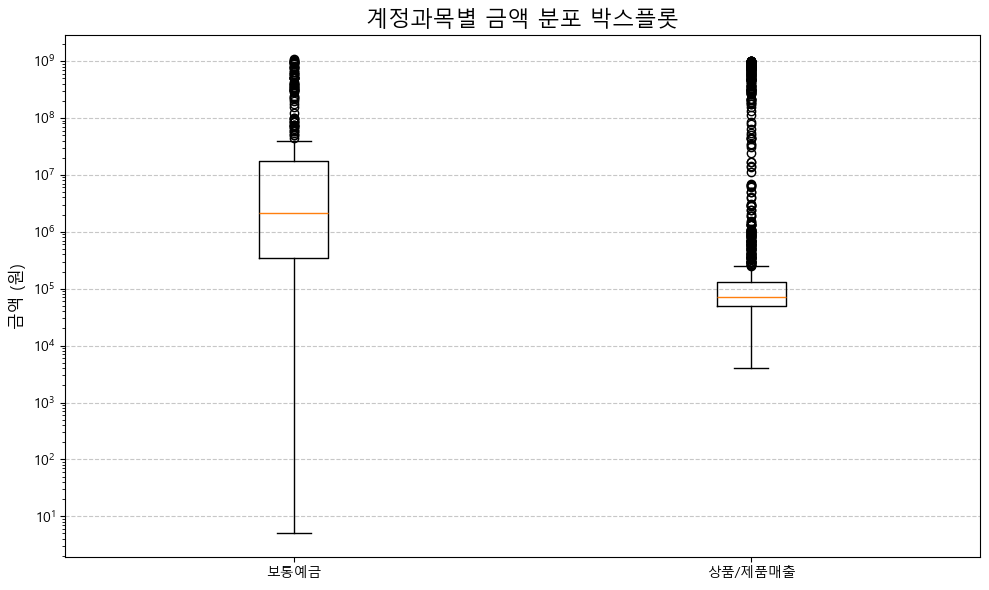

In [25]:
#계정과목 중, 제품매출 계정 금액 분석
#'계정과목' 컬럼에 존재하는 모든 고유값들을 리스트로 불러옵니다.
unique_accounts = df['계정과목'].unique().tolist()
print("'계정과목' 컬럼의 모든 고유값:")
print(unique_accounts)
print("\n" + '_'*20)

#이상치 분석 함수 정의
def find_outliers_iqr(df, column_name):
    """
    IQR 방법을 사용하여 특정 컬럼의 이상치를 탐지하는 함수입니다.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers, lower_bound, upper_bound
    
#'계정과목'이 '제품매출'인 거래만 필터링합니다.
product_sales_df = df[df['계정과목'] == '제품매출'].copy()

#필터링된 데이터에 이상치 분석 적용
if product_sales_df.empty:
    print("조건을 만족하는 '제품매출' 데이터가 없습니다.")
else:
    # '제품매출'의 '대변금액' 이상치 분석
    credit_outliers, credit_lower, credit_upper = find_outliers_iqr(product_sales_df, '대변금액')
    
    print("'제품매출' 거래의 '대변금액' 이상치 분석 결과:")
    print(f"하위 경계선: {credit_lower:,} 원")
    print(f"상위 경계선: {credit_upper:,} 원")
    print("-" * 50)
    if credit_outliers.empty:
        print("탐지된 이상치가 없습니다.")
    else:
        print(f"총 {len(credit_outliers)}건의 이상치 데이터가 탐지되었습니다.")
        print(credit_outliers.head())

    print("\n" + "=" * 50 + "\n")
    
    # '제품매출'의 '차변금액' 이상치 분석
    debit_outliers, debit_lower, debit_upper = find_outliers_iqr(product_sales_df, '차변금액')
    
    print("'제품매출' 거래의 '차변금액' 이상치 분석 결과:")
    print(f"하위 경계선: {debit_lower:,} 원")
    print(f"상위 경계선: {debit_upper:,} 원")
    print("-" * 50)
    if debit_outliers.empty:
        print("탐지된 이상치가 없습니다.")
    else:
        print(f"총 {len(debit_outliers)}건의 이상치 데이터가 탐지되었습니다.")
        print(debit_outliers.head())

# (선택사항) 모든 이상치 데이터를 엑셀 파일로 저장
# debit_outliers.to_excel('차변_이상치_전체.xlsx', index=False)
# credit_outliers.to_excel('대변_이상치_전체.xlsx', index=False)

#(추가) 계정과목별 데이터 시각화 by boxplot
import matplotlib.pyplot as plt

# 폰트 설정 (Mac)
# plt.rcParams['font.family'] = 'AppleGothic'
# 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 2. 첫 번째 조건: 계정과목이 '보통예금'인 거래 필터링
condition1_df = df[df['계정과목'] == '보통예금'].copy()
debit_amounts_condition1 = condition1_df[condition1_df['차변금액'] != 0]['차변금액'].abs()
credit_amounts_condition1 = condition1_df[condition1_df['대변금액'] != 0]['대변금액'].abs()
condition1_amounts = pd.concat([debit_amounts_condition1, credit_amounts_condition1])

# 3. 두 번째 조건: 계정과목이 '상품매출' 또는 '제품매출'인 거래 필터링
condition2_df = df[df['계정과목'].isin(['상품매출', '제품매출'])].copy()
debit_amounts_condition2 = condition2_df[condition2_df['차변금액'] != 0]['차변금액'].abs()
credit_amounts_condition2 = condition2_df[condition2_df['대변금액'] != 0]['대변금액'].abs()
condition2_amounts = pd.concat([debit_amounts_condition2, credit_amounts_condition2])

# 4. 박스플롯을 위한 데이터 준비
data_to_plot = [condition1_amounts, condition2_amounts]
labels_to_plot = ['보통예금', '상품/제품매출']

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data_to_plot, tick_labels=labels_to_plot, vert=True)

# 5. 그래프 설정
ax.set_title('계정과목별 금액 분포 박스플롯', fontsize=16)
ax.set_ylabel('금액 (원)', fontsize=12)
ax.set_yscale('log')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#(선택사항) 그래프를 파일로 저장
#plt.savefig('account_amount_boxplots.png')
        


## 2.벤포드 분석

벤포드의 법칙 분석 결과:
   이론적 빈도(%)  관측된 빈도(%)
1      30.10      18.80
2      17.60       8.04
3      12.50       8.73
4       9.70       6.63
5       7.90      21.17
6       6.70      10.36
7       5.80      14.37
8       5.10       5.68
9       4.60       6.22


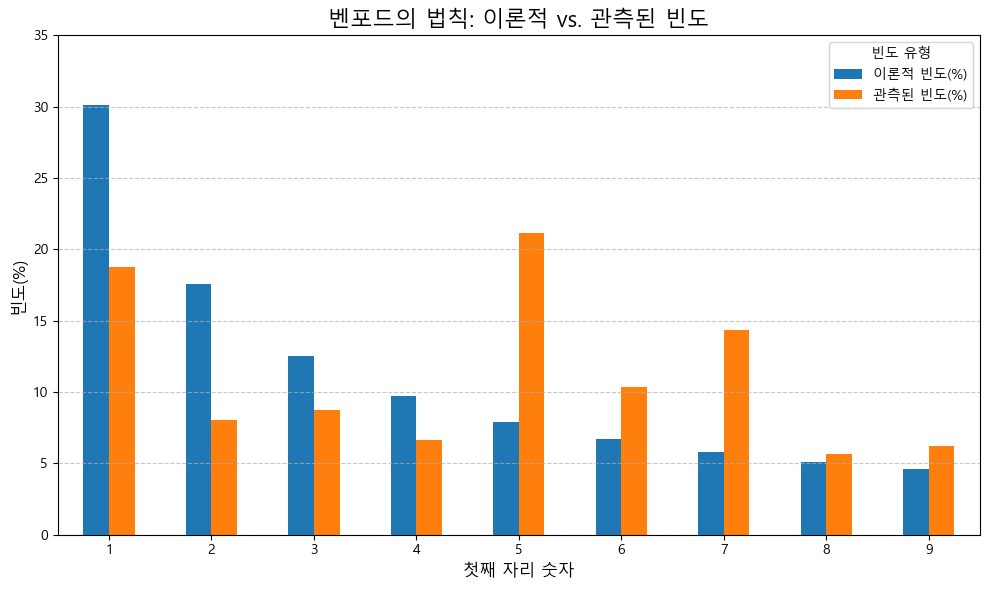

In [26]:
# 첫째 자리 숫자가 1일 확률이 가장 높고, 9일 확률이 가장 낮다는 통계적 현상. 절대값 기준.

#전체기록에 대하여 실행
# '차변금액'과 '대변금액'을 하나의 시리즈로 통합합니다.
# 0인 금액은 분석에서 제외합니다.

#만약 일부 계정과목만 수행하고 싶은 경우
# '제품매출' 계정과목으로만 필터링한 새로운 DataFrame을 만듭니다.
# 만약 '보통예금'을 분석하고 싶다면 '제품매출'을 '보통예금'으로 변경하세요.
# filtered_df = df[df['계정과목'] == '제품매출']
# 이후 해당 filtered_df의 차변,대변금액 concat

amounts = pd.concat([df['차변금액'], df['대변금액']]).abs()
amounts = amounts[amounts != 0]



#각 금액의 첫 번째 숫자(leading digit)를 추출합니다. (숫자는 개별 인덱싱이 힘드므로, 숫자-문자-숫자 변환)
leading_digits = amounts.astype(str).str[0].astype(int)

#각 첫 번째 숫자의 빈도수와 백분율을 계산합니다.
#value_counts(): 각 고유값의 개수를 셉니다.
#sort_index(): 숫자 순서대로 정렬합니다.
observed_counts = leading_digits.value_counts().sort_index()
observed_frequency = observed_counts / observed_counts.sum() * 100

#벤포드의 법칙에 따른 이론적 분포치.
benford_law = pd.Series([
    30.1, 17.6, 12.5, 9.7, 7.9,
    6.7, 5.8, 5.1, 4.6
], index=range(1, 10))

#결과와 이론값을 DataFrame으로 정리하여 한눈에 비교할 수 있게 만듭니다.
results = pd.DataFrame({
    '이론적 빈도(%)': benford_law,
    '관측된 빈도(%)': observed_frequency
})

#출력
#출력 형식 제어:데이터가 많을 때  ...로 생략. to_string()을 사용하면 생략 없이 전체 내용을 출력
#소수점 서식 지정:float_format="%.2f" 매개변수를 통해 소수점 둘째 자리까지만 표시
print("벤포드의 법칙 분석 결과:")
print(results.to_string(float_format="%.2f"))

#(선택사항) 결과를 CSV 파일로 저장합니다.
#results.to_csv('benford_analysis_results.csv', encoding='utf-8-sig')
#print("\n 벤포드 분석 결과가 'benford_analysis_results.csv' 파일로 저장되었습니다.")






#____________________________
#(추가) 그래프 시각적 분석
import matplotlib.pyplot as plt

# 폰트 설정 (Mac)
# plt.rcParams['font.family'] = 'AppleGothic'
# 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 5. 그래프로 시각화
fig, ax = plt.subplots()
results.plot(kind='bar', ax=ax, rot=0, figsize=(10, 6))

# 그래프 설정
ax.set_title('벤포드의 법칙: 이론적 vs. 관측된 빈도', fontsize=16)
ax.set_xlabel('첫째 자리 숫자', fontsize=12)
ax.set_ylabel('빈도(%)', fontsize=12)
ax.set_ylim(0, 35)
ax.legend(title='빈도 유형')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#(선택사항) 그래프를 파일로 저장
#plt.savefig('benford_analysis_chart.png')



## 3.Z-score 및 수정 Z-score

In [27]:
import numpy as np
# '차변금액'과 '대변금액'을 하나의 Series로 합치고, 절대값으로 변환합니다.
# 인덱스가 섞이는 것을 방지하고, 원본 데이터와 일치시켜야 나중에 이상치 데이터를 정확히 추출할 수 있습니다.
# 1.먼저 데이터프레임으로 차변, 대변금액을 절댓값으로 변환
amounts_series = pd.concat([df['차변금액'].abs(), df['대변금액'].abs()], axis=1)

# 2.분석에 사용할 모든 금액을 '하나의 Series로 변환'하고 0인 값은 제외합니다.
all_amounts = pd.concat([amounts_series['차변금액'].abs(), amounts_series['대변금액'].abs()])
all_amounts = all_amounts[all_amounts != 0]

# --- Z-점수 이상치 탐지 ---
# Z-점수 계산
mean_val = all_amounts.mean()
std_val = all_amounts.std()
z_scores = (all_amounts - mean_val) / std_val

# Z-점수 기준으로 이상치 필터링 (적용한 기준 : |Z| > 3.0)
#.index는 이 마스크(조건)가 True인 행들의 인덱스만 따로 뽑아내는 역할을 합니다.
z_score_outlier_indices = z_scores[z_scores.abs() > 3.0].index

# 원본 데이터프레임에서 이상치 추출
# loc은 원본데이터의 변경(정렬, 행 삭제 등)에도 불구하고 안정적으로 원하는 행(~고유index라벨)을 찾을 수 있으므로 
z_score_outliers = df.loc[z_score_outlier_indices]

print("Z-점수 방법으로 탐지된 이상치:")
print(f"총 {len(z_score_outliers)}건의 이상치가 발견되었습니다.")
print(z_score_outliers.head())

print("\n" + "_" * 20)




# --- 수정된 Z-점수 이상치 탐지 ---
# 중간값을 기준으로, 정규분포 아닐때 유용. but 비대칭에는 여전히 영향
# 수정된 Z-점수 계산
median_val = all_amounts.median()
# MAD(중앙값 절대 편차) 계산
mad = np.median(np.abs(all_amounts - median_val))
# 0.6745는 정규분포를 가정하여 MAD를 표준편차와 유사하게 만드는 상수입니다.
modified_z_scores = 0.6745 * (all_amounts - median_val) / mad

# 수정된 Z-점수 기준으로 이상치 필터링 (적용한 기준 : |M| > 3.5)
modified_z_score_outlier_indices = modified_z_scores[modified_z_scores.abs() > 3.5].index

# 원본 데이터프레임에서 이상치 추출
modified_z_score_outliers = df.loc[modified_z_score_outlier_indices]

print("수정된 Z-점수 방법으로 탐지된 이상치:")
print(f"총 {len(modified_z_score_outliers)}건의 이상치가 발견되었습니다.")
print(modified_z_score_outliers.head())

# (선택사항) 모든 이상치 데이터를 엑셀 파일로 저장
# z_score_outliers.to_excel('Z-score_이상치_전체.xlsx', index=False)
# modified_z_score_outliers.to_excel('M_Z-score_이상치_전체.xlsx', index=False)

Z-점수 방법으로 탐지된 이상치:
총 180건의 이상치가 발견되었습니다.
        전표일자  전표번호   계정코드      계정과목        차변금액  대변금액  거래처코드 입력사원  \
8   20230101  3240  10301      보통예금   520300000     0  14995  361   
11  20230102  3333  24000  컴퓨터소프트웨어   800800000     0   9196  361   
54  20230107  3261  10301      보통예금   954800000     0  11295  361   
57  20230107  3276  24000  컴퓨터소프트웨어   882200000     0  83000  361   
60  20230108  3282  24000  컴퓨터소프트웨어  1074700000     0  82342  361   

                   입력일자  
8   2023-01-04오후3:14:08  
11  2023-01-04오후3:14:08  
54  2023-01-10오후5:09:41  
57  2023-01-10오후5:09:41  
60  2023-01-10오후5:09:41  

____________________
수정된 Z-점수 방법으로 탐지된 이상치:
총 1511건의 이상치가 발견되었습니다.
        전표일자  전표번호   계정코드      계정과목       차변금액  대변금액  거래처코드 입력사원  \
8   20230101  3240  10301      보통예금  520300000     0  14995  361   
11  20230102  3333  24000  컴퓨터소프트웨어  800800000     0   9196  361   
17  20230104   179  10800     외상매출금     880000     0  14733  260   
32  20230105     2  25100     외상매입금    1622511  